# CMOS II

## 第一章 带隙基准

### 与电源无关的电流源

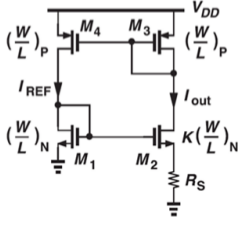

> 不要认为图上M3的尺寸画错了。没错。

利用M1和M2的g端电压相等列出方程
\begin{align}
    V_{GS1} = V_{GS2} + I_{out} R_S
\end{align}
由
\begin{align}
    & I_{out} = {1 \over 2} \mu_n C_{ox} (W / L)_N (V_{GS1} - V_{TH1})^2 \\
    & I_{out} = {1 \over 2} \mu_n C_{ox} K (W / L)_N (V_{GS2} - V_{TH2})^2
\end{align}
得到
\begin{align}
    V_{GS1} &= V_{TH1} + \sqrt{2 I_{out} \over \mu_n C_{ox} (W / L)_N} \\
    V_{GS2} &= V_{TH2} + \sqrt{2 I_{out} \over \mu_n C_{ox} K (W / L)_N}
\end{align}
认为$V_{TH1} = V_{TH2}$。带入方程
\begin{align}
    \sqrt{2 I_{out} \over \mu_n C_{ox} (W / L)_N} \left(1 - {1 \over \sqrt{K}}\right) = I_{out} R_S
\end{align}
解得
\begin{align}
    I_{out} = {2 \over \mu_n C_{ox} (W / L)_N} {1 \over R_S^2} \left(1 - {1 \over \sqrt{K}}\right)^2
\end{align}

### 启动问题

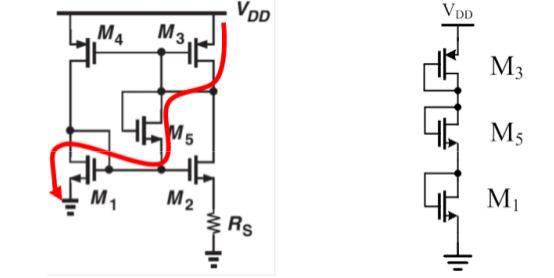

目的是通过控制M5的通断来控制。

M5开启的时候
\begin{align}
    V_{GS5} > V_{TH5}
\end{align}
即
\begin{align}
    (V_{DD} - |V_{GS3}|) - (V_{GS1}) > V_{TH5}
\end{align}

M5关断时
\begin{align}
    V_{GS5} < V_{TH5}
\end{align}
即
\begin{align}
  (V_{DD} - |V_{GS3}| - (V_{GS1}) < V_{TH5}  
\end{align}

### 敏感度 aka. sensitivity

> 我觉得这个定义得很糟糕。首先我不知道这里$x, y$是小信号量还是大信号量。

当$x$变化时$y$的变化

> 这不应该是导数吗？
>
> 如果是研究$y$跟随$x$的变化，那么$x$应该是自变量，$y = f(x)$。但是很奇怪，下面的例子里没有哪个最后给出的式子是以右下方的变量为自变量的。

\begin{align}
    S_x^y = {x \over y} {dy \over dx}
\end{align}

敏感度有这个性质
\begin{align}
    S_x^y = S_x^z S_z^y
\end{align}

如果验证发现$x = k y$，那么敏感度直接就是1
\begin{align}
    S_x^y = {x \over y} {dy \over dx} = k \cdot {1 \over k} = 1 
\end{align}
下面的例子会看到。

### $V_t$参考基准 aka. $V_t$ referenced bias

这里的$V_t$就是指MOS的阈值电压$V_{TH}$。

> 我不知道这里为什么非要用$V_t$，增加识别难度。

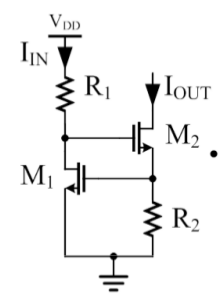

\begin{align}
    I_{out} = {V_{GS1} \over R_2} = {V_{TH} + V_{OV1} \over R_2} \approx {V_{TH} \over R_2}
\end{align}
上面约等于号成立的条件是使用大器件，使$V_{OV} \ll V_{TH}$。

顺便
\begin{align}
    V_{ov1} = \sqrt{2 I_{in} \over \mu_n C_{ox} (W / L)}
\end{align}

敏感度
\begin{align}
    S_{V_{DD}}^{I_{out}} &= S_{V_{DD}}^{I_{in}} S_{I_{in}}^{I_{out}} \\
    &= 1 \cdot {I_{in} \over I_{out}} {dI_{out} \over dI_{in}} \\
    &= {I_{in} R_2 \over V_t + V_{ov1}} \sqrt{2 \over \mu_n C_{ox} (W / L)} {1 \over R_2} {1 \over 2 \sqrt{I_{in}}} \\
    &\color{red}{= {1 \over 2} {V_{ov1} \over V_{TH} + V_{ov1}}} \\
    &= {1 \over 2} {\sqrt{2 I_{in} \over \mu_n C_{ox} (W / L)} \over V_{TH} + \sqrt{2 I_{in} \over \mu_n C_{ox} (W / L)}}
\end{align}

> $S_{V_{DD}}^{I_{in}} = 1$的原因是
\begin{align}
    i_{in} = {g_{m1} g_{m2} R_2 \over g_{m1} g_{m2} R_1 R_2 + g_{m2} R_2 + 1} v_{dd}
\end{align}
可以看到$i_{in}$和$v_{dd}$差一个系数，所以敏感度是1。
>
> 但是到底敏感度是只针对小信号而言还是对于大信号而言呢？

#### BTJ实现版本

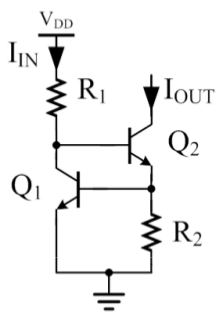

BJT的电流表达式是
\begin{align}
    I = I_{sat} \exp\left({V_{BE} \over V_T}\right)
\end{align}
其中$V_T = {k T \over q}$称为热电压 aka. thermal voltage。

所以上面的电流表达式是
\begin{align}
    I_{out} = {V_{BE} \over R_2} = {1 \over R_2} \cdot {k T \over q} \ln {I_{in} \over I_{sat}}
\end{align}

敏感度
\begin{align}
    S_{V_{DD}}^{I_{out}} &= 1 \cdot S_{I_{in}}^{I_{out}} \\
    &= {I_{in} \over I_{out}} {dI_{out} \over dI_{in}} \\
    &= {R_2 q I_{in} \over k T \ln{I_{in} \over I_{sat}}} \cdot {k T \over R_2 q} {I_{sat} \over I_{in}} {1 \over I_{sat}} \\
    &= {1 \over \ln{I_{in} \over I_{sat}}} \\
    &\color{red}{= {1 \over V_{BE1}} {k T \over q}}
\end{align}

#### 自偏置 aka. self-biasing

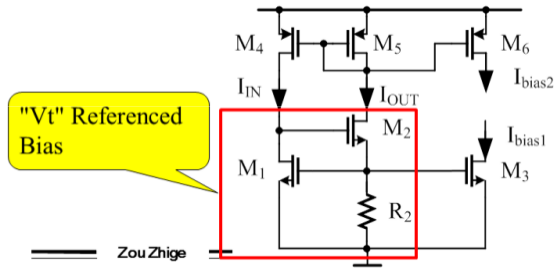

上面的例子里，$V_{DD}$的变化对$I_{out}$的影响很大。

所以一个可能的改进就是再把输出电流再镜像回去。

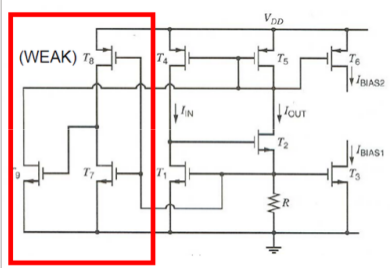

自偏置同样也有启动问题。所以可以外加一个启动电路。

### 温度无关的基准源

为了制造与温度无关的基准源，可以用负温度系数和正温度系数的两个器件组合起来。

负温度系数的器件就是BTJ。它的$V_{BE}$具有负温度系数
\begin{align}
    {dV_{BE} \over dT} = - 1.5 \cdot 10^{-3} \,{\rm V / K}
\end{align}

正温度系数的器件是**两个工作在不同电流下的BJT的$V_{BE}$的差值**。

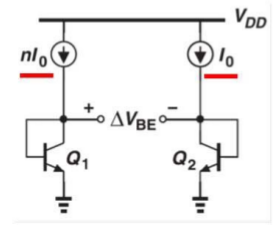

对于Q1
\begin{align}
    V_{\rm BE1} = V_T \ln {n I_0 \over I_{sat}} 
\end{align}

对于Q2
\begin{align}
    V_{\rm BE2} = V_T \ln {I_0 \over I_{sat}}
\end{align}

所以
\begin{align}
    \Delta V_{BE} &= V_{BE1} - V_{BE2} \\
    &= V_T \ln n
\end{align}

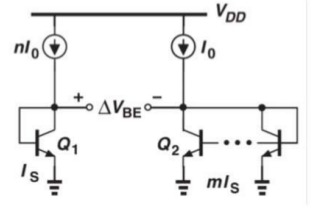

对于Q1
\begin{align}
    V_{\rm BE1} = V_T \ln {n I_0 \over I_{sat}} 
\end{align}

Q2是$m$个全同的BJT并联。我们看其中的一个BJT。它可以被分配到$I_0 / m$的电流
\begin{align}
    V_{\rm BE2} &= V_T \ln {{I_0 \over m} \over I_{sat}} \\
    &= V_T \ln {I_0 \over m I_{sat}}
\end{align}

所以
\begin{align}
    \Delta V_{\rm BE} = V_T \ln mn
\end{align}

#### 带隙基准

现在已经有了一个正温度系数组件$\Delta V_{BE}$和一个负温度系数组件$V_{BE}$。要想办法把它们按加权加起来。

问题是，它们的温度系数差的很大
\begin{align}
    {dV_{\rm BE} \over dT} &= -1.5 \cdot 10^{-3} \,{\rm V / K} \\
    {d\Delta V_{\rm BE} \over dT} &= 0.087 \cdot 10^{-3} \,{\rm V / K}
\end{align}

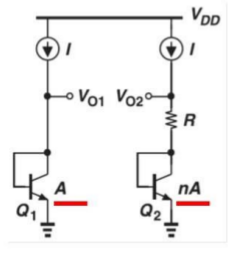

可以想到用这种方法组合
- Q2的CE两端提供$V_{BE}$
- R的两端提供$\Delta V_{BE}$

显然$V_{o2}$就是$V_{BE} + \Delta V_{BE}$。

问题在于
\begin{align}
    \ln 29,502,925 = 17.2
\end{align}

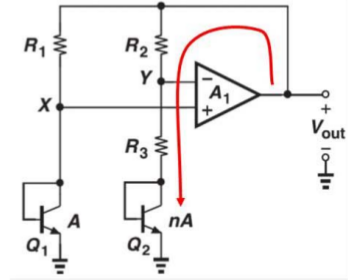

\begin{align}
    V_X &= V_{BE1} \\
    V_Y &= V_{BE2} + I_2 R_3
\end{align}
虚短
\begin{align}
    V_X = V_Y
\end{align}
所以右边支路电流是
\begin{align}
    I_2 &= {V_{BE1} - V_{BE2} \over R_3} \\
    &= {\Delta V_{BE} \over R_3}
\end{align}

所以输出电压是Q2的电压加上$R_2, R_3$上的压降
\begin{align}
    V_{out} &= V_{BE2} + I_2 (R_2 + R_3) \\
    &= V_{BE2} + \Delta V_{BE} {R_2 + R_3 \over R_3} \\
    &= V_{BE2} + V_T \ln n \cdot {R_2 + R_3 \over R_3} \\
\end{align}

#### 失调

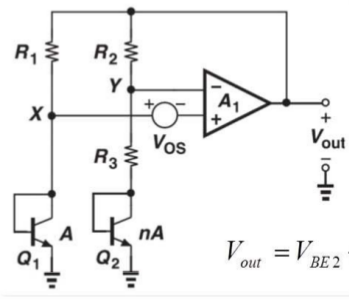

X和Y点电压不再相等了，而是差一个$V_{OS}$。根据虚短
\begin{align}
    V_X - V_{OS} = V_Y
\end{align}
所以
\begin{align}
    V_{BE1} - V_{OS} = V_{BE2} + I_2 R_3
\end{align}

所以还是按上面的方法，先算右边支路的电流
\begin{align}
    I_2 &= {V_Y - V_{BE2} \over R_3} \\
    &= {V_{BE1} - V_{OS} - V_{BE2} \over R_3} \\
    &= {\Delta V_{BE} \color{red}{- V_{OS}} \over R_3}
\end{align}
所以输出电压
\begin{align}
    V_{out} &= V_{BE2} + I_2 (R_2 + R_3) \\
    &= V_{BE2} + (V_T \ln n \color{red}{- V_{OS}}) {R_2 + R_3 \over R_3}
\end{align}

如果不失调的时候，系统的输出电压的温度系数是0，那么现在有了失调，温度系数变成正的了。而且失调被放大了$1 + {R_2 \over R_3}$倍。
> 总之就是不为0了。

解决办法
- 大尺寸放大器
- 调大Q1和Q2的电流比
- 两个二极管接法的BJT串联

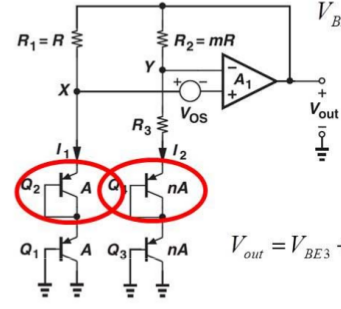

这里$R_1 = R, R_2 = mR$的目的是为了使左右支路的电流比近似为$m$。

\begin{align}
    V_X &= V_{BE1} + V_{BE2} \\
    V_Y &= V_{BE3} + V_{BE4} + I_2 R_3
\end{align}
现在因为失调
\begin{align}
    V_X - V_{OS} = V_Y
\end{align}
即
\begin{align}
   V_{BE1} + V_{BE2} - V_{OS} = V_{BE3} + V_{BE4} + I_2 R_3
\end{align}
所以右边电路的电流是
\begin{align}
    I_2 &= {2 \Delta V_{BE} - V_{OS} \over R_3}
\end{align}
所以输出电压是
\begin{align}
    V_{out} &= V_{BE3} + V_{BE4} + I_2 (R_2 + R_3) \\
    &= \color{red}{2} V_{BE} + (\color{red}{2} V_T \ln m n - V_{OS}) {R_2 \over R_2 + R_3}
\end{align}
可以看到$V_{OS}$的影响被削弱了。

> 一定要注意这里
\begin{align}
    \Delta V_{BE} = V_T \ln \color{red}{m}n
\end{align}

**这个电路没法用CMOS实现。**因为有BJT的c极没接地。

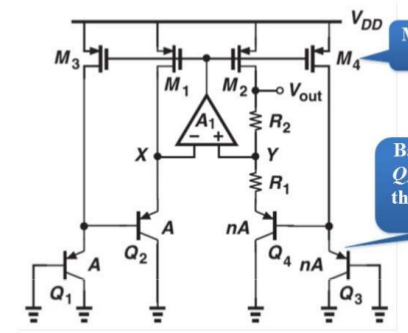

这个电路可以用CMOS实现，因为所有的BJT的c极都接地了。

\begin{align}
    V_X &= V_{BE1} + V_{BE2} \\
    V_Y &= V_{BE3} + V_{BE4} + I_2 R_1
\end{align}
所以
\begin{align}
    V_X = V_Y
\end{align}
所以右边支路的电流
\begin{align}
    I_2 = {2 \Delta V_{BE} \over R_1}
\end{align}
这里
\begin{align}
    \Delta V_{BE} = V_T \ln n
\end{align}

> 为什么不是$2n$？因为经过Q3的电流不看，只看经过Q4的电流。

所以输出电压
\begin{align}
    V_{out} &= V_{BE4} + V_{BE3} + I_2 (R_1 + R_2) \\
    &= 2 V_{BE} + 2 V_T \ln n \cdot {R_1 + R_2 \over R_1}
\end{align}

### PTAT电流 aka. 与温度成正比的电流

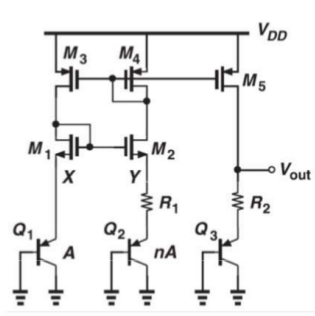

\begin{align}
    V_{out} = I R_2 + V_{BE3}
\end{align}
其中$I$又是从M4镜像过来的，所以要先算出$I$。观察得到$R_1$上的电压降正好是$\Delta V_{BE}$
\begin{align}
    I = {\Delta V_{BE} \over R_1} = {V_T \ln n \over R_1}
\end{align}
所以
\begin{align}
    V_{out} = {R_2 \over R_1} V_T \ln n + V_{BE3}
\end{align}

### 恒定$G_m$偏置

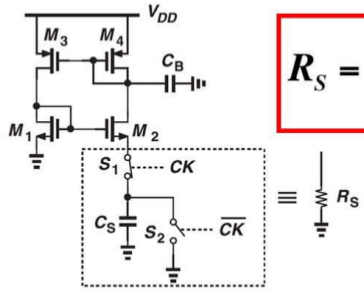

在[上面的简单电路里](#%E4%B8%8E%E7%94%B5%E6%BA%90%E6%97%A0%E5%85%B3%E7%9A%84%E7%94%B5%E6%B5%81%E6%BA%90)，电阻$R_S$不够精确，也会随温度变化，所以要想办法把它变得精确一点。

这里就用了开关电容等效电阻
\begin{align}
    R_S \approx {1 \over C_S f_{CLK}}
\end{align}

### 几个例子

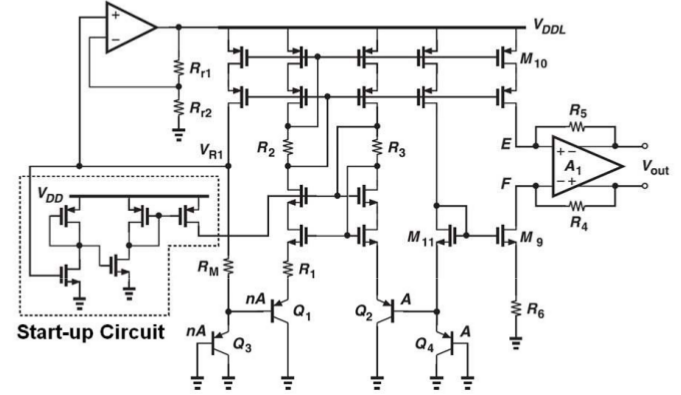

观察这个电路，发现很复杂。输出电压是一个差分的，需要分别计算出流过$R_5, R_4$的电流。

最终输出电压是R5上的电压降加上R4上的电压降。
\begin{align}
    V_{out} &= V_{R_5} + V_{R_4} \\
    &= I_{up} R_5 + I_{down} R_4
\end{align}
$I_{up}$是从电压源经过M10, R5流到输出正端的电流；$I_{down}$是从输出负端流过R4, M9, R6的电流。分别来计算。

先看$I_{down}$，因为简单一点。电流流过R4之后从M9流过R6，而M11, M9成一对电流镜，所以流过R6的电流就是流过Q4的电流，所以R6上端和Q4的s端电压相等，而Q4的s端电压是$V_{BE4}$，所以流过R6的电流是
\begin{align}
    I_{down} = {V_{BE4} \over R_6}
\end{align}

再看$I_{up}$。M10, M2成一对电流镜，所以流过R5的电流就是流过Q1的电流。流过Q1的电流就是流过R1的电流。R1阻值已知，所以只要知道电压降就可以。电压降很好办，就是$2 \Delta V_{BE} = 2 V_T \ln n$。所以
\begin{align}
    I_{up} = {2 V_T \ln n \over R_1}
\end{align}
> 为什么这里有个2？因为是两个二极管接法，所以差值有两个。可以看[上面的例子](#%E5%A4%B1%E8%B0%83)。

所以输出电压是
\begin{align}
    V_{out} = {R_4 \over R_5} V_{BE4} + {2 R_5 \over R_1} V_T \ln n
\end{align}

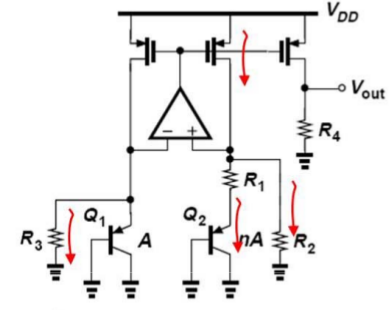

> 这个电路看不懂。

\begin{align}
    V_{out} &= I_3 R_4 \\
    &= \left({V_{BE1} \over R_3} + {\Delta V_{BE} \over R_1}\right) R_4 \\
    &= \left({V_{BE1} \over R_3} + {V_T \ln n \over R_1}\right) R_4 \\
\end{align}

> 下面几个有时间再看吧。当开眼界。

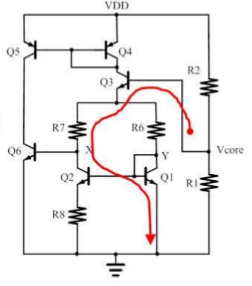

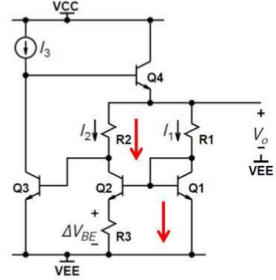

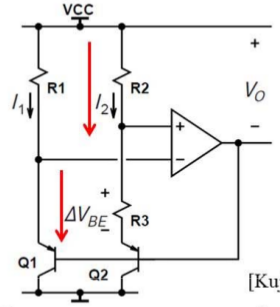

## 第二章 开关电容

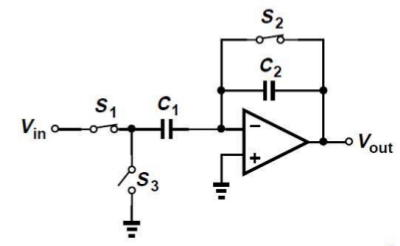

优点
- 能采样
- 反馈电容不引起负载效应
    
    不会影响放大器的输出阻抗，不降低放大器的增益。
    
- CMOS中易实现

    因为电容的**匹配**精度比电阻高。
    
缺点
- 需要时钟
- 电荷转移需要时间

$s$域的解释
\begin{align}
    V_{out} &= {{1 \over s C_2} \over {1 \over s C_1}} V_{in} \\
    &= {C_1 \over C_2} V_{in}
\end{align}

1. S1, S2闭合；S3断开

    电路相当于一个单位增益接法的放大器。此时$V_{out} = V_B = 0$。
    
    $V_{in}$给电容充电。稳定下来之后，电容左端正电右端负电。电容两端电压差$V_A - V_B$为$V_{in} - 0$，所以电容$C_1$上的电量是$C_1 V_{in}$。左极板带正电$C_1 V_{in}$，右极板带负电$- C_1 V_{in}$。

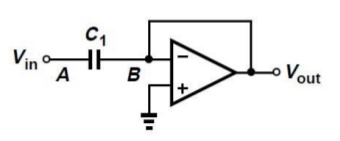

2. S1, S2断开；S3闭合

    ~~A点突然接地，但是电容两端的电压差不能突变，所以$V_A - V_B$在开关切换的瞬间仍然保持$V_{in}$，所以$V_B = - V_{in}$。~~
        
    因为$C_1$的左端接地了，所以$C_1$开始放电，左极板电压为0，左极板电荷最终也为0，这样右极板无法再吸引负电荷，所以原先积累在$C_1$右极板上的负电荷$- C_1 V_{in}$只能全部转移到$C_2$的左极板上。$C_2$的左端积累负电，电量是$- C_1 V_{in}$，右端也感应出正电荷，电量是$C_1 V_{in}$。根据$Q = CV$，所以$C_2$上的电压降是
    
    \begin{align}
        V_{out} = {C_1 V_{in} \over C_2}
    \end{align}
    
    也可以用电荷守恒方程来理解
    \begin{align}
        C_1 V_{in} = C_2 (V_{out} - 0)
    \end{align}

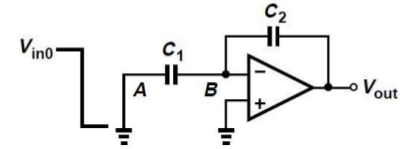

### 采样开关

#### MOS开关

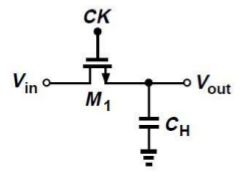

这个单MOS开关有很多问题
- **对单NMOS开关**，最大输出电平$V_{out}$无法达到$V_{in}$，而只能达到$V_{in} - V_{THN}$；**对单PMOS开关**，最小输出电平$V_{out}$无法达到0，能达到$|V_{THP}|$。

    但是如果考虑亚阈值效应，$V_{out}$是**能够**到达$V_{in}$的。只是这需要非常长的时间。
    
- 速度慢

    因为MOS在饱和区之后导通电阻上升。而时间常数$\tau =  RC$。
        
    解决方案
    - 用传输门 aka. PMOS和NMOS互补开关
    
        可以显著降低导通电阻。
    
        传输门的问题
        - 需要非常精准的互补时钟。而互补时钟的产生需要经过反相器，而反相器会带来延时。
        
            解决方案
            - 正向时钟经过两个反相器，反向时钟经过一个反相器和一个传输门。保证正向反向时钟同步。
            
    - 用大尺寸器件
    
        可以减小寄生电容、减小导通电阻。
    
- 精度问题

    - 沟道电荷注入
    
        MOS关闭的时候，沟道里的电荷会从d和s端流出。造成$C_H$上的电压有误差。
        
        MOS开启的时候沟道积攒的电荷量是
        \begin{align}
            Q_{ch} = W L C_{ox} (V_{DD} - V_{in} - V_{TH})
        \end{align}
        
        > ch应该是channel的意思。但是这个电荷值为什么是这个呢？拉扎维说是第二章里推导的公式，我去看了一下，好像是那么回事。
        \begin{align}
            Q_{ch} = W L C_{ox} (V_{GS} - V_{TH})
        \end{align}
        
        假设关闭时沟道上有一半的电荷流出到输入端、另一半电荷流出到采样电容上。那么这个多出来的电荷存到采样电容$C_H$上，就会导致采样电容上的电荷量不精确
        \begin{align}
            Q' = V_{in} C_H + \underbrace{{1 \over 2} Q_{ch}}_{\Delta Q}
        \end{align}
        所以采样电容上的电压也会不精确
        \begin{align}
            V' = V_{in} + \underbrace{Q_{ch} \over C_H}_{\Delta V}
        \end{align}
        记后面多出来的一部分为$\Delta V$
        \begin{align}
            \Delta V = {W L C_{ox} (V_{DD} - V_{in} - V_{TH}) \over 2 C_H}
        \end{align}
        
        但实际上这种假设是不精确的。所有的电荷都流出到采样电容上也是可能的。
        
    - 时钟馈通
    
        时钟信号通过MOS的寄生电容$C_{GD}, C_{GS}$耦合到$C_H$上。这个交叠电容的值是$C = C_{ov} W$。$C_{ov}$是第二章里定义的单位宽度的交叠电容值。
        
        可以理解成采样电容$C_H$和一个寄生交叠电容$C$串联，然后输出端在电容之间，所以输出端被电容分压了。
        \begin{align}
            \Delta V &= V_{CLK} {{1 \over s C_H} \over {1 \over s C} + {1 \over s C_H}} \\
            &= V_{CLK} {C \over C + C_H} \\
            &= V_{CLK} {W C_{ov} \over W C_{ov} + C_H}
        \end{align}
        
    - 热电噪声 aka. KT/C噪声
    
        当开关开启时，有热电噪声。当开关断开时，采样时刻的热电噪声被采样到了采样电容上。热电噪声引起的标准差电压是
        \begin{align}
            V_n = \sqrt{k T \over C}
        \end{align}
        
        解决办法
        - 增大采样电容
        
            缺点
            - 增加电路负载
            - 降低采样速度

#### 沟道电荷注入抵消

有3种方案
- dummy器件
- 传输门
- 差分采样

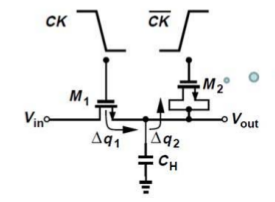

用一个dummy器件、图中的M2来吸收掉M1断开时漏出来的电荷。

M1和M2上的时钟反相，所以当采样时刻到来的时候，M1断开，泄露电荷；M2开启，正好要形成沟道反型层，正好吸收了来自M1的电荷。

假设M1会把一半的沟道电荷注入到采样电容端，M2能全部吸收沟道电荷。那么
\begin{align}
    \Delta q_1 &= {1 \over 2} W_1 L_1 C_{ox} (V_{DD} - V_{in} - V_{TH}) \\
    \Delta q_2 &= W_2 L_2 C_{ox} (V_{DD} - V_{in} - V_{TH})
\end{align}
所以能看出
\begin{align}
    {1 \over 2} W_1 L_1 = W_2 L_2
\end{align}
如果让$L_1 = L_2$，那么宽度比设置成${1 \over 2} W_1 = W_2$，即M2的宽度是M
的宽度的一半。

问题是**一半的沟道电荷注入到采样电容端**的假设可能不成立。

**顺便还能消除时钟馈通。**怎么做到的？先计算M1上的时钟下降引起的时钟馈通误差电压。一定要记得这是个前后两个时刻的差值
\begin{align}
    \Delta V_1 &= - V_{CLK} {{1 \over s C_H} // {1 \over s 2 W_2 C_{ov}} \over {1 \over s C_H} // {1 \over s 2 W_2 C_{ov}} + {1 \over s W_1 C_{ov}}} \\
    &= - V_{CLK} {W_1 C_{ov} \over W_1 C_{ov} + C_H + 2 W_2 C_{ov}}
\end{align}
再计算M2上的时钟上升引起的效应
\begin{align}
    \Delta V_2 &= + V_{CLK} {{1 \over s 2 W_2 C_{ov}} \over {1 \over s W_1 C_{ov}} // {1 \over s C_H} + {1 \over s 2 W_2 C_{ov}}} \\
    &= + V_{CLK} {2 W_2 C_{ov} \over 2 W_2 C_{ov} + W_1 C_{ov} + C_H}
\end{align}
用叠加定理，这样M1和M2对输出节点电压的效应是
\begin{align}
    \Delta V_1 + \Delta V_2 = 0
\end{align}

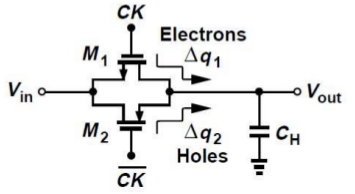

利用电子和空穴电荷正好抵消的性质。

\begin{align}
    & \Delta q_1 = - W_1 L_1 C_{ox} (V_{CLK} - V_{in} - V_{THN}) \\
    & \Delta q_2 = W_2 L_2 C_{ox} (V_{in} - |V_{THP}|)
\end{align}

> 因为M1是NMOS，释放的是电子，所以电荷有负号。

如果$\Delta q_1 + \Delta q_2 = 0$，就能互相补偿掉注入的电荷。

**不能顺便消除时钟馈通效应。**因为NMOS和PMOS的gd交叠电容$C_{GD}$不相等。

### 一个优值

\begin{align}
    F = {1 \over \tau \Delta V} = {\mu_n \over L^2}
\end{align}
其中
\begin{align}
    \tau &= R_{on} C_H \\
    \Delta V &= {W L C_{ox} \over C_H} (V_{DD} - V_{in} - V_{TH})
\end{align}

用于衡量电荷注入、采样速度。

### 开关电容放大器

#### 单位增益放大器

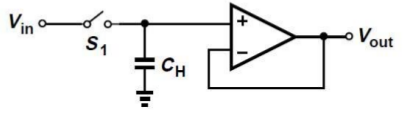

最简单的就是1个开关搭配1个采样电容。

问题
- 精度低。有注入效应。

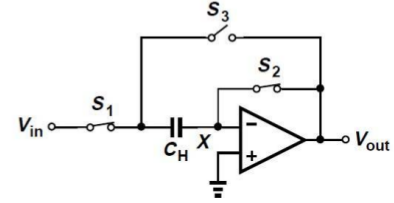

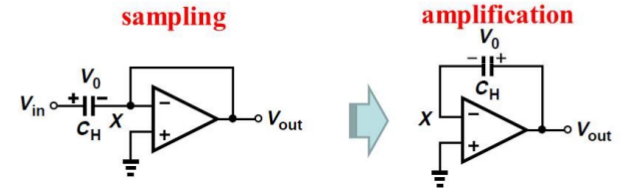

改进之后，变成3个开关、1个采样电容。

- 采样阶段

    S1, S2闭合；S3断开。
    
    放大器的高增益要求X点是虚地，所以在此阶段采样电容$C_H$上积累电荷$C_H V_{in}$。$C_H$的左极板积累正电，电荷量是$C_H V_{in}$；右极板积累负电，电荷量是$- C_H V_{in}$。
    
    从采样阶段变成放大阶段的步骤是
    1. S2断开
    
        以断开X点和地或电源的一切通路，使X点**悬空**。
        
    1. S1断开
    1. S3闭合
    
    如果S2不在S1之前断开的，而是在S1之后断开的话，S1往电容注入的电荷会在电容右极板上感应出正电荷，并且S2一旦断开，X点悬空，这些正电荷就会永远留在X点。**开关断开的先后顺序很关键**。
    
- 放大阶段
    
    S1, S2断开；S3闭合。
    
    此时采样电容的左极板接输出端，左极板电荷量是$C_H V_{in}$；右极板接输入端，右极板的电荷量是$- C_H V_{in}$。所以采样电容上的电压降是$V_{in}$，又因为左极板接放大器输入端，虚地，所以右极板电压是$V_{in}$，又因为右极板接的是输出端，所以输出端电压是$V_{in}$。

开关注入分析。中心思想是**所有不影响输入放大器节点总电荷的操作都没有影响**。注意总电荷。

- S1的注入

    S1断开的时候，向电容注入电荷。假设最坏情况，全部注入，那么有负电荷$- \Delta q_1$到电容的左极板上，并且在右半边感应出正电荷$\Delta q_1$。**但是**因为是感应出来的，所以X点的**总电荷量不变**，因为S2断开后，X点完全悬空，没有任何从地或电源吸引电荷的通路。
    
    所以一到S3闭合，左极板上的$- \Delta q_1$马上通过输出端放电放掉了，右极板上的多余电荷$\Delta q_1$也立刻中和而完全消失了。
    
- S2的注入

    > 这里不是很明白。
    
    S2断开的时候，释放出沟道电荷。假设最坏情况，所有的电荷都注入到X点了，那么$C_H$的右极板又加上了电荷量为$- \Delta q_2 = - W L C_{ox} (V_{CLK} - V_X - V_{TH})$的电子。这样右极板的总电荷量是$- V_{in} C_H - \Delta q_2$。
    
    于是左极板也感应出了等量正电荷，这样左极板的电荷量是$V_{in} C_H + \Delta q_2$。
    
    那么左右极板的电荷量发生了变化，那么电容上的电压差一定会变化。电压差原来是$V_{in}$，现在变成了$V_{in} + {\Delta q_2 \over C_H}$。但是电容左边的电压是定死的$V_{in}$，不可能改变的。所以只能右边的电压改变。右边的电压本来是虚地所以是0，现在变成了$- {\Delta q_2 \over C_H}$。相当于加了一个电压源。
    
    这个就是所谓的失调。
    
- S3的注入

    S3闭合需要吸收沟道电荷，这些电荷全部来自放大器的输出端，所以S3没有任何影响。

#### 正相放大器

#### 乘2器

### 积分器

#### 离散时间电阻

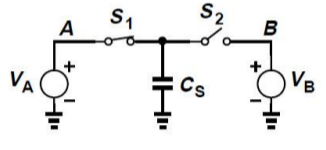

1. S1闭合，S2断开

    $V_A$给$C_S$充电。流入$C_S$的电荷是$V_A C_S$。
    
1. S1断开，S2闭合

    $C_S$给$V_B$放电。流出$C_S$的电荷是$(V_A - V_B) C_S$。
    
    这边的流出电荷可以这么算。一开始$C_S$上的电荷是
    \begin{align}
        q_1 = V_A C_S
    \end{align}
    然后放电之后，$C_S$上的电荷是
    \begin{align}
        q_2 = V_B C_S
    \end{align}
    流出电容的电荷就是
    \begin{align}
        \Delta q = q_1 - q_2 = (V_A - V_B) C_S
    \end{align}
    
1. S1闭合，S2断开

    $V_A$再次给$C_S$充电。流入$C_S$的电荷**不是**$V_A C_S$了。而是$(V_A - V_B) C_S$。
    
上面的步骤往复循环，发现每个周期，$C_S$转手的电荷量都是$(V_A - V_B) C_S$。根据电流的定义
\begin{align}
    I = {dq \over dt}
\end{align}
那么可以说从A到B每个周期的平均电流是
\begin{align}
    \bar{I} &= {\Delta q \over T} \\
    &= {(V_A - V_B) C_S \over T} \\
    &= f_{CLK} (V_A - V_B) C_S
\end{align}

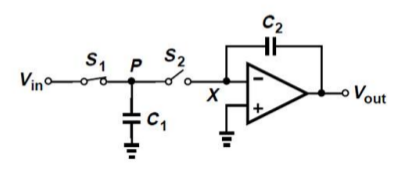

这里用离散时间电阻代替普通的电阻。X点之前的部分就可以看做是离散时间电阻，阻值是$f_{CLK} V_{in} C_1$。

如果$V_{in} \equiv C$，那么每个周期，$V_{out}$都下降${C_1 \over C_2} C$。

每个周期$V_{out}$的最终值都可以表示为一个递归式
\begin{align}
    V_{out}(k T) = V_{out}((k - 1)T) - {C_1 \over C_2} V_{in}((k - 1)T)
\end{align}

> 这里不知道怎么理解这个式子。

这个简单积分器的问题
- S1的注入效应
- S1和S2的MOS寄生电容

解决办法

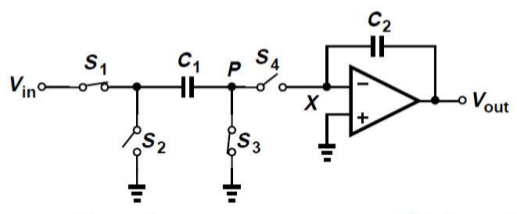

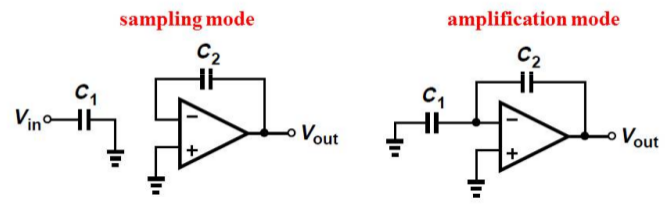

## 第三章 振荡器

### 巴克豪森准则

\begin{align}
    |H(j 2 \pi f_0)| &\geq 1 \\
    \angle H(j 2 \pi f_0) &= (2k - 1) \pi
\end{align}

### 环形振荡器

单极点系统无法振荡的原因是，最大相位只能到$90 {}^\circ$。

一般的双极点系统虽然能够达到相位$180 {}^\circ$，但是这个相位发生在$f \to +\infty$，而在频率非常高的时候，增益早就已经远小于1。不可能满足巴克豪森准则了。

但是有一个**特例**，两个理想积分器级联可以振荡，因为相位一直是$180 {}^\circ$。满足准则。

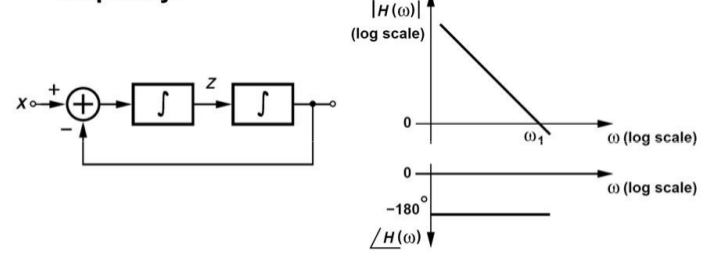

#### 三级环形振荡器

假设每一级的小信号传输函数是
\begin{align}
    H_i(s) = - {A_0 \over 1 + {s \over \omega_0}}
\end{align}
那么三级环形振荡器的**环路增益**是
\begin{align}
    H(s) = H_i(s)^3 = - {A_0^3 \over \left(1 + {s \over \omega_0}\right)^3}
\end{align}

> 这里的环路增益等于开环传输函数，因为反馈系数$\beta = 1$。

令
\begin{align}
    & |H(j \omega)| = 1 \\
    & \angle H(j \omega) = \pi
\end{align}
算出来是
\begin{align}
    & A_0 = 2 \\
    & \omega = \sqrt{3} \omega_0
\end{align}
所以小信号振荡频率是
\begin{align}
    f_0 = {\sqrt{3} \omega_0 \over 2 \pi} = {\sqrt{3} \over 2 \pi \cdot R_D C_L}
\end{align}

但是大信号振荡频率是
\begin{align}
    f_0 = {1 \over 6 T_D}
\end{align}
其中$T_D$是每一级的延时。

可见小信号振荡频率和大信号振荡频率一般不相等。可以认为电路在刚开始振荡的时候，振荡频率是小信号振荡频率，但是随着振荡幅度增大，电路进入非线性，不能再用小信号模型去描述了，因此最终振荡频率是大信号振荡频率。

### LC振荡器

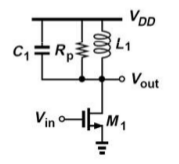

以LC并联回路为负载的CS。特点
- 在谐振频率${1 \over \sqrt{L_p C_p}}$上，增益很高，等于$-g_m R_p$。在其他频率上，增益很低。
- 如果$L_p$的寄生电阻很小，那么等效$R_p$会很小，$V_{out}$会非常靠近电源电压，所以谐振的时候，输出电压可能**超过**电源电压。

#### 交叉耦合振荡器

用两个LC并联回路负载的CS级联。

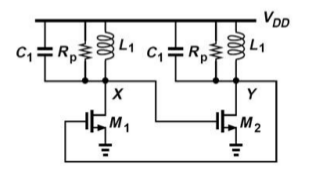

小信号起振频率是
\begin{align}
    f_0 = {1 \over 2 \pi \sqrt{L_p (C_p \color{red}{+ C_{GS2} + C_{DB1} + 4 C_{GD}})}}
\end{align}

> 这里$C_{GD}$前面的系数是4的原因据说是假设每一级增益是1，所以根据密勒等效，对地电容值翻倍。

#### 科尔皮兹振荡器 aka. Colpitts oscillator

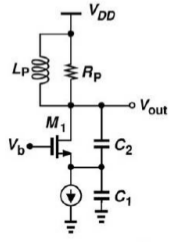

小信号起振频率
\begin{align}
    f_0 = {1 \over 2 \pi \sqrt{L_p (C_p + C_1 // C_2)}}
\end{align}

\begin{align}
    g_m R_p &= {C_1 \over C_2} \left(1 + {C_2 \over C_1}\right)^2 \\
    &= x \left(1 + {1 \over x}\right)^2 \\
    &= x + {1 \over x} + 2 \\
    &\geq 4
\end{align}

要求增益至少为4。

> 为什么这个不等式说明增益至少是4呢？

#### 单端口振荡器

基于**负电阻**而不是正反馈。

普通的并联LC回路在单位冲击响应下的响应是一个衰减的振荡，因为电感上有电阻，会消耗功率，使每次振荡周期都损失一部分能量。如果能够补偿这部分损失的能量，比如并联一个负电阻$- R_p$，并联LC回路会成为理想LC回路，从而永远振荡下去。

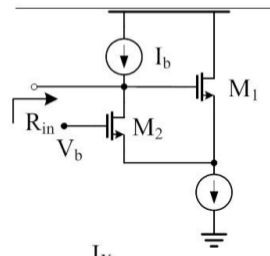

可以用一个带正反馈的SF作负电阻。列出小信号方程
\begin{align}
    g_{m2} (0 - v_x) + g_{m1} (v_i - v_x) = 0
\end{align}
解得
\begin{align}
    v_x = {g_{m1} v_i \over g_{m1} + g_{m2}}
\end{align}
所以输入电流是
\begin{align}
    i_i &= g_{m2} (0 - v_x) \\
    &= {- g_{m1} g_{m2} \over g_{m1} + g_{m2}} v_i
\end{align}
输入电阻是
\begin{align}
    r_i = {v_i \over i_i} = {g_{m1} + g_{m2} \over - g_{m1} g_{m2}}
\end{align}
如果$g_{m1} = g_{m2} = g_m$，那么
\begin{align}
    r_i = - {2 \over g_m}
\end{align}

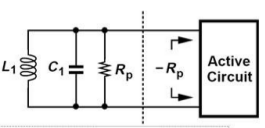

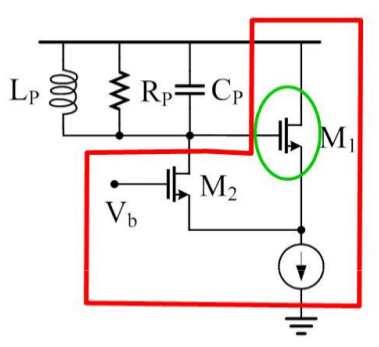

这样把负电阻和LC并联回路并联起来，就得到了单端口振荡器。

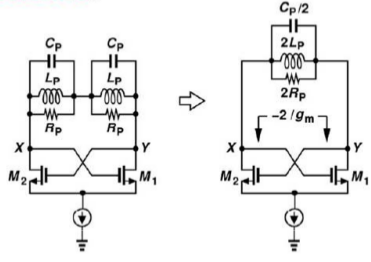

也可以做成差分的结构。发现这样就是交叉耦合振荡器。

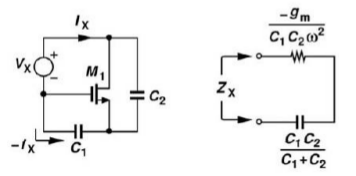

另一种负电阻。列出小信号方程
\begin{align}
    v_x s C_1 + (v_x - v_i) s C_2 = g_m (0 - v_x)
\end{align}
解得
\begin{align}
    v_x = {s C_2 \over g_m + (C_1 + C_2) s} v_i
\end{align}
输入电流是
\begin{align}
    i_i &= v_x s C_1 \\
    &= {s^2 C_1 C_2 \over g_m + (C_1 + C_2) s} v_i
\end{align}
所以输入电阻是
\begin{align}
    r_i &= {v_i \over i_i} \\
    &= {g_m + (C_1 + C_2) s \over s^2 C_1 C_2} \\
    &= {g_m \over C_1 C_2 s^2} + {1 \over s C_1} + {1 \over s C_2}
\end{align}
带入$s = j\omega$，得到
\begin{align}
    r_i = {- g_m \over C_1 C_2 \omega^2} + {1 \over j \omega C_1} + {1 \over j \omega C_2}
\end{align}
相当于一个负电阻串联两个电容。

> 这里必须设定一个参考零电位点。不然算不出来。

### 压控振荡器 aka. VCO

#### 环形振荡器的频率调节

$n$级环形振荡器的大信号振荡频率是
\begin{align}
    f_0 = {1 \over 2 n T}
\end{align}
其中$T$是每一级的延时。

如果能用电压调节每一级的延时$T$，就能实现电压控制振荡频率。

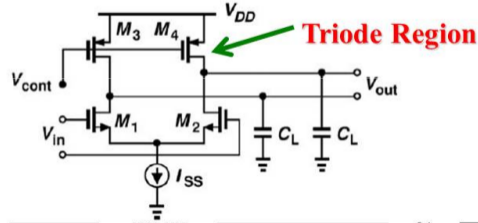

当$V_{cont}$增大的时候，M3和M4的导通电阻增大，相当于增大了时间常数$\tau$，提高了延时$T$，振荡频率下降。

但是这种电路的问题是**输出摆幅也随着$V_{cont}$的变化而剧烈变化**。如果需要保持输出摆幅不变化，需要$V_{cont}$不仅控制M3和M4的导通电阻，还要控制尾电流$I_{SS}$，使$V_{cont}$增大时，$I_{SS}$减小。

#### LC振荡器的频率调节

要调节LC振荡器的振荡频率，实际上调节并联LC回路的谐振频率。而谐振频率和L、C有关，因此可以
- 调节L
- 调节C

但是调节L很难，而调节C可以用**可变电容**。

#### VCO的数学模型

频率其实是相位的导数
\begin{align}
    \omega(t) = {d\phi(t) \over dt}
\end{align}

根据前面VCO的定义，貌似$V_{cont}$的改变可以立即改变$\omega_{out}$，但实际上要保证相位可导
\begin{align}
    {d\phi_{\rm out}(t) \over dt} = K_{\rm VCO} V_{\rm cont}(t)
\end{align}
如果两边作Laplace变换
\begin{align}
    s \Phi_{\rm out}(s) = K_{\rm VCO} V_{\rm cont}(s)
\end{align}
得到VCO的传输函数
\begin{align}
    H(s) = {\Phi_{\rm out}(s) \over V_{\rm cont}(s)} = {K_{\rm VCO} \over s}
\end{align}
可见VCO就类似于一个积分器。

所以输出电压$V_{\rm out} = V_m \cos(\phi_{\rm out}(t))$可以写成
\begin{align}
    V_{\rm out} &= V_m \cos \left(\int_{t_0}^{t} \omega_{\rm out}(t) \,dt\right) \\
    &= V_m \cos \left(\omega_0 t + K_{\rm VCO} \int_{t_0}^t V_{\rm cont}(t) \,dt\right)
\end{align}

## 第四章 锁相环

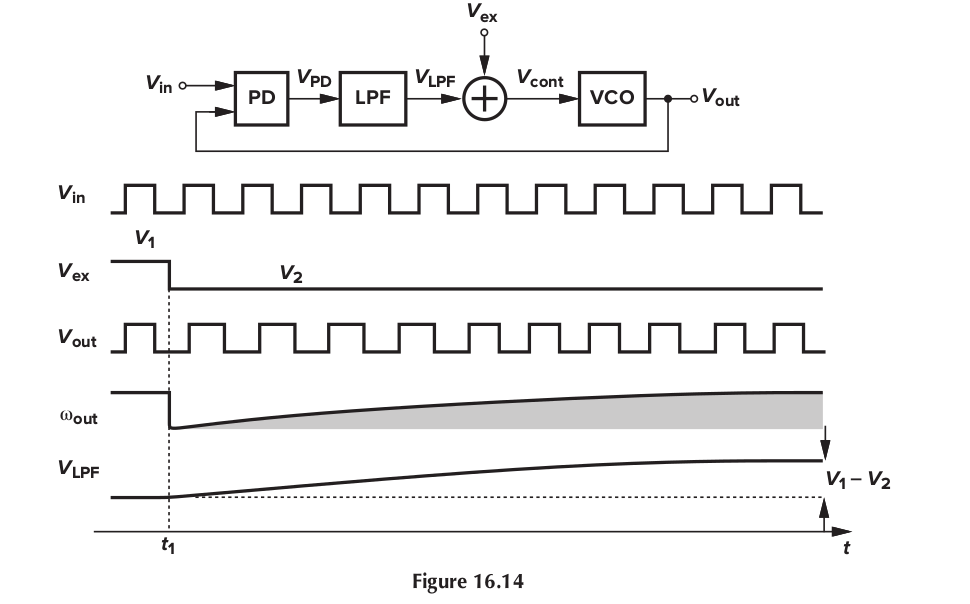

### PD aka. 鉴相器

顾名思义用于鉴别输入的两个信号的相位差，并且用电压的形式输出出来。相位差越大，输出电压越大。

在$s$域
\begin{align}
    V_{PD} = K_{PD} (\Phi_{out} - \Phi_{in})
\end{align}

### LPF aka. 低通滤波器

在$s$域
\begin{align}
    V_{LPF} = {V_{PD} \over 1 + s \tau}
\end{align}

### 加法器

在$s$域
\begin{align}
    V_{cont} = V_{LPF} + V_{ex}
\end{align}

### VCO aka. 压控振荡器

在时域
\begin{align}
    {d\phi_{out} \over dt} = K_{cont} V_{cont}(t)
\end{align}

在$s$域
\begin{align}
    s \Phi_{out} = K_{cont} V_{cont}
\end{align}

### PLL的传输函数

结合上面的每个部件的输出表达式，有
\begin{align}
    s \Phi_{out} = K_{cont} \left({K_{PD} \Phi_{out} \over 1 + s \tau} + V_{ex}\right)
\end{align}
解得
\begin{align}
    H(s) = {\Phi_{out} \over V_{ex}} = {K_{cont} \over\displaystyle s - {K_{cont} K_{PD} \over 1 + s \tau}}
\end{align}

## 第五章 反馈

> 这本书我无力吐槽，各种奇怪的不知所云的写法。
>
> 列举一个，见208页
> \begin{align}
    \left.{1 \over s C_s}\right|_{p_{CL} = ??} = ???
\end{align}
> 谁能告诉我这是什么东西。我可能明白他是想说$s = p_{CL}$。不对，还差一个$2 \pi$哦！这本书里的零极点都是Hz单位的哦。
>
> 而且电路图都不会画，各种节点悬空。谁看得懂？这样的书为什么有人会奉为经典。

先记住几个快速运算技巧
- cascode输出电阻

    从靠近输出端到远离输出端的顺序是M1, M2。
    
    \begin{align}
        g_{m1} r_{o1} r_{o2}
    \end{align}
    
- 共栅输入电阻

    从输入端到电源是M1, R。
    
    \begin{align}
        {r_{o1} + R \over 1 + g_{m1} r_{o1}}
    \end{align}
    
- 带源级负反馈电阻的CS的电压增益

    \begin{align}
        {g_{m1} R_D \over 1 + g_{m1} R}
    \end{align}
    
- 带源级负反馈电阻的CS的输出电阻

    \begin{align}
        g_{m1} r_{o1} R
    \end{align}
    
    发现和cascode是完全一样的。这是对的。

### 几个例子

> Mora给我们展现了高超的$G_m R_{out}$法。

#### 源级负反馈电路

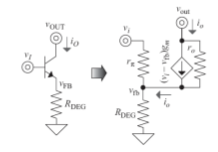

画出小信号等效电路，然后解KCL
\begin{align}
    v_{fb} &= {g_m v_i \over {1 \over r_o} + {1 \over R} + g_m} \\
    &= g_m \left(r_0 // R // {1 \over g_m}\right) v_i
\end{align}
然后又因为
\begin{align}
    i_o = {v_{fb} \over R}
\end{align}
然后所有的参数都出来了
\begin{align}
    A &= {i_o \over v_{fb}} \\
    &= {g_m \left(r_0 // R // {1 \over g_m}\right) \over R}
\end{align}

\begin{align}
    \beta = {v_{fb} \over i_o} = R
\end{align}

> 但是我有点不太理解，这个电路用反馈的方法解、和通用的节点法解似乎没什么区别。都很烦。难道用反馈法解电路不是为了方便吗？

如果用**反馈法**，几乎一眼就能看出来
\begin{align}
    A &\approx g_m \\
    \beta &\approx R
\end{align}
所以
\begin{align}
    H \approx {g_m \over 1 + g_m R}
\end{align}
和书上的结果一模一样。

**书上的做法**看不懂。

#### 电压控制的级联电流源 aka. voltage controlled regulated cascode current source

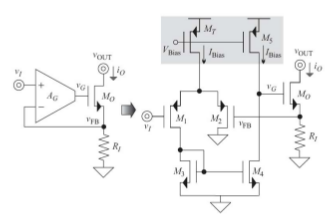

> 这里我的想法更加强烈。反馈法有没有节省时间？
>
> 而且你还要考虑那个放大器的输入电阻、输出电阻？

画出节点法
\begin{align}
    & {v_{fb} - v_i \over r_i} + {v_{fb} \over R} + {v_{fb} \over r_{o2}} = g_{m2} [v_g - v_{fb}] \\
    & v_g = A_G(v_i - v_{fb}) r_o
\end{align}
算出来
\begin{align}
    v_{fb} = {{1 \over r_i} + g_{m2} A_G r_o \over {1 \over r_i} + {1 \over R} + {1 \over r_{o2}} + g_{m2}(A_G r_o + 1)} v_i
\end{align}
所以
\begin{align}
    i_o = {v_{fb} \over R}
\end{align}
所以
\begin{align}
    A &= {i_o \over v_i - v_{fb}} \\
    &= {1 \over R} {v_{fb} \over v_i - v_{fb}} \\
    &= {1 \over R} {1 \over {v_i \over v_{fb}} - 1} \\
    &= {1 \over R} {{1 \over r_i} + g_{m2} A_G r_o \over {1 \over R} + {1 \over r_{o2}} + g_{m2}} \\
    &= {{1 \over r_i} + g_{m2} A_G r_o \over 1 + {R \over r_{o2}} + g_{m2} R}
\end{align}
反馈系数
\begin{align}
    \beta = {v_{fb} \over i_o} = R
\end{align}

如果用**反馈法**
\begin{align}
    A &\approx g_{m2} A_G r_o \\
    \beta &\approx R
\end{align}
所以
\begin{align}
    H = {g_{m2} A_G r_o \over 1 + g_{m2} A_G r_o R}
\end{align}

**书上的做法**
\begin{align}
    A = {i_o \over v_e} = {v_g \over v_e} {i_o \over v_g}
\end{align}
想想$A_G$放大器的内部结构。因为$v_g = A_G v_e r_o$，所以
\begin{align}
    {v_g \over v_e} = A_G r_o
\end{align}
想想源级负反馈的跨导表达式近似是$g_m \over 1 + g_m R$，所以
\begin{align}
    {i_o \over v_g} \approx {g_{mO} \over 1 + g_{mO}(R // r_i)}
\end{align}
> 不理解这里为什么会并联一个$r_i$。

\begin{align}
    \beta = {v_{fb} \over i_o} = R // r_i
\end{align}
> 还是不理解这里为什么会并联一个$r_i$。

> 给我的感觉就是全靠猜。作者要解一个电路却不给你电路，你都不知道他写的式子是针对哪个电路的。端口还是悬空的。等号也不知道是不是真的等号还是约等于。

> $v_i$竟然可以直接接地，匪夷所思。如果接地，$v_{fb}$马上等于0，还算什么？

#### source sampling current sink aka. 电源采样电流池？

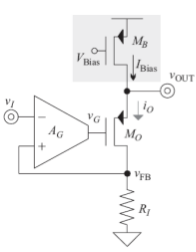

> 实在是看不出来这里输出电流还是电压。书上说输出电流，那就听它的。

**书上的做法**
\begin{align}
    A = {i_o \over v_e} = {v_g \over v_e} {i_o \over v_g}
\end{align}
想想$A_G$的内部结构。$v_g = - A_G v_e r_o$。所以
\begin{align}
    {v_g \over v_e} = - A_G r_o
\end{align}
想想带源级负反馈电阻的CS跨导表达式是${g_m \over 1 + g_m R}$，那么这里也是类似的结构，只不过源级负反馈电阻变成了上面的$M_B$偏置管。这次下面的$R, r_i$都不用管
\begin{align}
    {i_o \over v_g} \approx {g_{mO} \over 1 + g_{mO} r_{oB}}
\end{align}
> 为什么这次$R, r_i$都不用管呢？

\begin{align}
    \beta = {v_{fb} \over i_o} = R // r_i
\end{align}

#### noninverting op amp aka. 非反相运算放大器

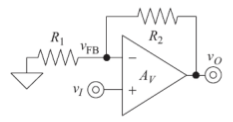

画出小信号
\begin{align}
    & {v_{fb} - v_i \over r_i} + {v_{fb} \over R_1} + {v_{fb} - v_o \over R_2} = 0 \\
    & {v_o - v_{fb} \over R_2} + {v_o - A_V(v_i - v_{fb}) \over r_o} = 0
\end{align}

**书上的做法**
\begin{align}
    A &\approx A_V
   \beta &\approx {R_1 \over R_1 + R_2}
\end{align}
> 我怀疑是因为op amp的输入电阻实在是太大了、输出电阻太小了，才使Mora突然变得这么仁慈。

\begin{align}
    R_{in, o} &= r_i + R_1 // (R_2 + r_o) \\
    R_{out, o} &= r_o // (R_2 + r_i // R_1)
\end{align}
> 我来告诉你这对电阻怎么算出来的：把$A_V$当做没有放大能力，然后直接算电阻网络的总电阻。

#### noninverting transitor amp aka. 非反相晶体管放大器

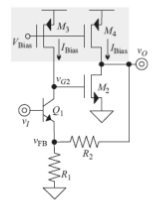

**反馈法**
\begin{align}
    A &\approx g_{m1} (r_{o1} // r_{o3}) g_{m2} (r_{o2} // r_{o4}) \\
    \beta &\approx {R_1 \over R_1 + R_2}
\end{align}

**书上的做法**
\begin{align}
    A = G_1 G_2
\end{align}
第一级增益是$g_{m1} (r_{d1} // r_{o3})$。$r_{d1}$是从Q1的d端往下看的电阻。不出意外这应该是个带源级负反馈的输出电阻所以
\begin{align}
    r_{d1} = g_{m1} r_{o1} \{R_1 // [R_2 + (r_{o4} // r_{o2})]\}
\end{align}

第二级增益是$M_2$的跨导乘以**整个电路**的输出电阻
\begin{align}
    G_2 = g_{m2} \{r_{o2} // r_{o4} // [R_2 + R_1 // \underbrace{r_{o3} + r_{o1} \over 1 + g_{m1} r_{o1}}_{共栅级电路的输入电阻}]\}
\end{align}
> 共栅级输入电阻是${R + r_o \over 1 + g_m r_o}$。

所以
\begin{align}
    A = g_{m1} (r_{d1} // r_{o3}) \cdot g_{m2} \left\{r_{o2} // r_{o4} // \left[R_2 + R_1 // {r_{o3} + r_{o1} \over 1 + g_{m1} r_{o1}}\right]\right\}
\end{align}

\begin{align}
    \beta = {{r_{o3} + r_{o1} \over 1 + g_{m1} r_{o1}} // R_1 \over {r_{o3} + r_{o1} \over 1 + g_{m1} r_{o1}} // R_1 + R_2}
\end{align}
他认为分压不仅要算$R_1$还要算$v_{fb}$点向上看的电阻，也就是共栅级输入电阻。

#### gate coupled pair amplifier aka. 栅耦合对放大器

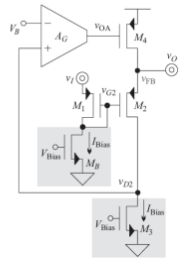

**书上的做法** 这个有点复杂，但也说得通。只关注$M_4$作为CS级的效应，发现
\begin{align}
    v_o = - g_{m4} (r_{o4} // r_{s2}) v_{oa}
\end{align}
那么$v_{oa}$又等于什么呢？发现
\begin{align}
    v_{oa} = A_G v_{d2} r_o
\end{align}
那么$v_{d2}$又等于什么呢？发现
\begin{align}
    v_{d2} = - i_o (r_{d2} // r_{o3} // r_i)
\end{align}
那么$i_o$又等于什么呢？发现$i_o$是左边voltage mixer的结果
\begin{align}
    i_o = g_{m2} (v_i - v_{fb}) = g_{m2} v_e
\end{align}
所以这样层层嵌套下来
\begin{align}
    A = {v_o \over v_e} = \underbrace{g_{m4} (r_{o4} // r_{s2})}_{M_4 \rm CS级增益} \cdot \underbrace{A_G r_o}_{A_G增益} \cdot \underbrace{g_{m2} (r_o3 // r_i // r_{d2})}_{混流器增益}
\end{align}
> ~~书上还有$R_{D2}, R_{S2}$我不理解是什么电阻。但是应该大差不差吧。~~
>
> 理解了。就是从M2的d端看进去的电阻、M2的s端看进去的电阻。

因为$v_{fb} = v_o$，所以
\begin{align}
    \beta = {v_{fb} \over v_o} = 1
\end{align}

#### regulated cascode current mirror aka. 规化堆叠电流镜

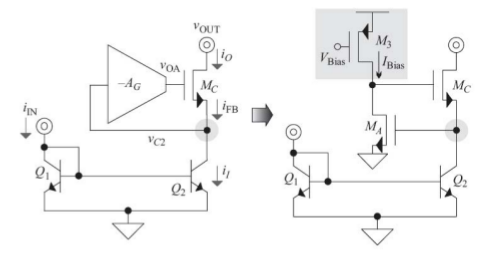

> 我们只看左边的框图。

**书上的做法**发现$i_o$是由带源级负反馈电阻的CS级$M_C$产生的
\begin{align}
    i_o = {g_{mC} \over 1 + g_{mC} r_{o2}} v_{oa}
\end{align}
而$v_{oa}$又是由跨导放大器$- A_G$产生的
\begin{align}
    v_{oa} = - A_G v_{c2} r_{oa}
\end{align}
而$v_{c2}$是电流$i_e$在$Q_2$上产生的

> 这里我不理解为什么流过$Q_2$的是$i_e$。而且这里的负号是怎么消掉的。

\begin{align}
    v_{c2} = - r_{o2} i_e
\end{align}
所以开环增益
\begin{align}
    A = {g_{mC} \over 1 + g_{mC} r_{o2}} A_G r_{oa} r_{o2}
\end{align}

#### 741尾电流源

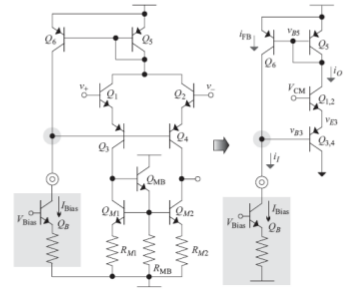

#### current amplifier aka. 电流放大器

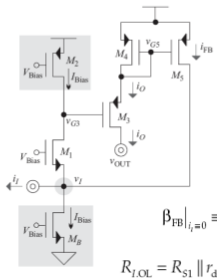

#### diode connected transistor aka. 二极管接法的晶体管

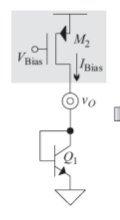

> 我完全看不懂这个电路的input在哪里。难道是电源吗？

#### inverting op amp aka. 反向放大器

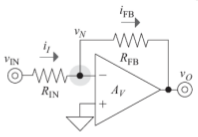

> 为什么一会是$A_V$，一会是$A_G$？

#### inverting transistor amp aka. 反向晶体管放大器

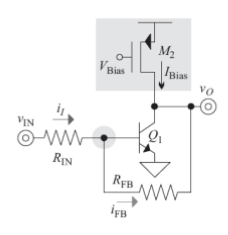

> 如果这里不是BJT，是MOS，这能有电流流进MOS管吗？

把$v_o$接地，发现反馈信号消失了，所以这是电压采样；反馈和输入在同一个节点，所以这是电流反馈。

> 那么既然输出信号是电压，哪来的$A_G$？

**PPT上的做法**虚短虚断
\begin{align}
    H \approx -{R_{FB} \over R_{IN}}
\end{align}

\begin{align}
    r_o = r_{o2} // r_{o1}
\end{align}

#### Miller capacitor aka. 密勒电容

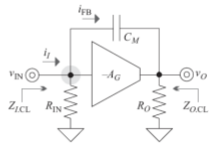

\begin{align}
    C_{in} &\approx (1 + A) C \approx A C \\
    C_{out} &\approx (1 + A^{-1}) C \approx C
\end{align}

### 波特图的画法

每次遇到一个极点，增益斜率都下降$20 \,{\rm dB/dec}$，相位
- 左半平面极点，相位在左右$2 \,{\rm dec}$下降$90^\circ$，在极点处相位$-45^\circ$
- 右半平面极点，相位在左右$2 \,{\rm dec}$上升$90^\circ$，在极点处相位$+45^\circ$

每次遇到一个零点，增益斜率都上升$20 \,{\rm dB/dec}$，相位
- 左半平面零点，相位在左右$2 \,{\rm dec}$上升$90^\circ$，在极点处相位$+45^\circ$
- 右半平面零点，相位在左右$2 \,{\rm dec}$下降$90^\circ$，在极点处相位$-45^\circ$

总结一下，遇到极点，增益斜率下降，正常情况（左半平面）相位下降；遇到零点，增益斜率上升，正常情况（左半平面）相位上升。

### 稳定性

最低标准是**相位在$-180^\circ$时，增益小于1**。为了保险，最好是**产生至少$45^\circ$相位裕度**。

最佳条件的等价条件是**环路增益在穿过$0 \,{\rm dB}$点的时候下降速率是$-20 \,{\rm dB/dec}$**、等价于第二个极点位于$0 \,{\rm dB}$频率之后。因为第二个极点上的相位正好是$-135^\circ$。所以能保证$45^\circ$相位裕度。

补偿以提高稳定性的方法有
- 加极点

    加个极点在最左边，这样使得曲线早一点以$-20\,{\rm dB/dec}$的速度下降，使得第二个极点能位于单位增益频率之后。
    
    实现
    - 加低通滤波器

- 移动极点

    和加极点的方法差不多。往低频移动第一个极点，这样第二个极点的频率不会变，但第二个极点所在的环路增益会下降。直到第二个极点的环路增益下降到单位增益以下。
    
- 分裂极点

    把第一个极点往低频推、同时也把第二个极点往高配推。

    实现
    - 加密勒电容
    
        缺点
        - 产生了右半平面零点
        
            因为电容在高频处产生前馈通路。
            
- 加入相位内零点

    实现
    - 和电容串联一个限流电阻
    - 加旁路电容
    - 加旁路电路

- 相位外零点
    
    实现
    - 把零点往高频推
        
        和密勒电容串联一个电阻。
        
    - 把右半平面零点转化成左半平面零点
    
        串联的电阻足够大$> {1 \over A_G}$。
        
    - 完全消除这个零点
    
        插入缓冲器
        - 电压缓冲器
        - 电流缓冲器
        - 密勒乘法缓冲器

## 第六章 非线性

### 非线性的度量

这里课件上和书上的定义不一致。书上是各次谐波能量（幅度平方和）的比值，课件上加了一个根号。
\begin{align}
    {\rm THD} = {\sum_{k=2}^\infty A_k^2 \over A_1^2}
\end{align}

> 但是很奇怪，这个定义在这里给出了之后，后面就再也没有用过。后面一切都是用的幅度的比值。

### CS的非线性

如果输入一个$V_i(t) = V_m \cos(\omega t)$信号
\begin{align}
    {A_{HD2} \over A_F} = {V_m \over 4(V_{GS} - V_{TH})}
\end{align}

### 差分CS的非线性

\begin{align}
    {A_{HD3} \over A_F} = {V_m^2 \over 32(V_{GS} - V_{TH})^2}
\end{align}

也可以理解成
\begin{align}
    {A_{HD3} \over A_F} = {1 \over 2} \left({A_{HD2} \over A_F}\right)^2
\end{align}

### 负反馈对非线性的抑制

设开环输出是$y(t) = \alpha_1 x(t) + \alpha_2 x(t)^2$，当输入是$x(t) = V_m \cos(\omega t)$时，输出变成$y(t) \approx a \cos(\omega t) + b \cos(2 \omega t)$

没有负反馈
\begin{align}
    {b \over a} = {\alpha_2 V_m \over 2 \alpha_1}
\end{align}

有负反馈
\begin{align}
    {b \over a} = {\alpha_2 V_m \over 2 \alpha_1} \cdot \color{red}{1 \over (1 + \beta \alpha_1)^2}
\end{align}

### 抑制非线性的方法

- 源级负反馈
- 后修正

    用另一个非线性效应**互补**的放大器级联。

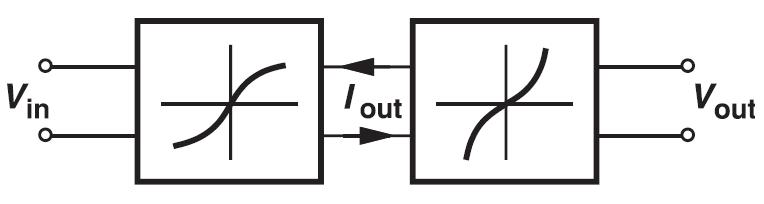

## 番外 运放设计

### 单级CS设计

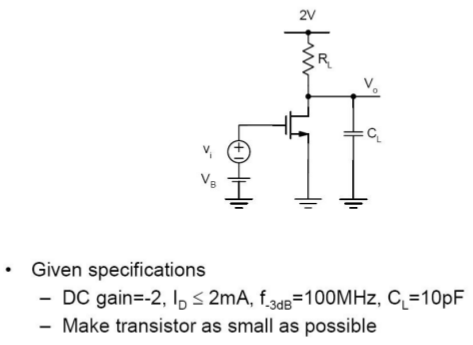

1. 算$R_L$

    先利用带宽条件

    \begin{align}
        f_{-3 \,{\rm dB}} = {1 \over 2 \pi R_L C_L}
    \end{align}
    式子里面$C_L, f$都知道，所以可以算出$R_L$。
    
1. 算$g_m$

    利用DC gain条件
    
    \begin{align}
        - g_m R_L = - 2
    \end{align}
    式子里面$R_L$上一步算出来了，所以可以算出$g_m$。
    
1. 选择$I_D$

    电流当然是全部用上。
    
1. 算$V_{ov}$

    \begin{align}
        g_m = {2 I_D \over V_{ov}}
    \end{align}
    
1. 算$W / L$

    有了$I_D, V_{ov}$就能算出$W / L$。
    
1. 选择$W, L$

    题目里说要晶体管越小越好，所以选择$L = L_\min$，这样$W$也出来了。
    
设计完成。

### 单级OTA设计

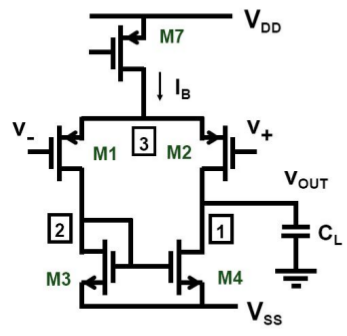

主极点是输出节点，次主极点是节点2。

低频增益
\begin{align}
    A_0 = g_{m1} (r_{o2} // r_{o4}) = g_{m1} {r_o \over 2}
\end{align}

带宽
\begin{align}
    f_1 = {1 \over 2 \pi r_{out} C_{out}} = {1 \over 2 \pi {r_o \over 2} (C_L + C_{n1})}
\end{align}

增益带宽积
\begin{align}
    {\rm GBW} = A_0 f = {g_{m1} \over 2 \pi (C_L + C_{n1})}
\end{align}

次主极点是节点2产生的
\begin{align}
    f_2 = {1 \over 2 \pi r_{n2} C_{n2}}
\end{align}
观察节点2上的所有电阻、所有电容，发现
\begin{align}
    r_{n2} = r_{o3} // {1 \over g_{m3}} // r_{o1} \approx {1 \over g_{m3}}
\end{align}

> 因为$r_{o1}, r_{o3}$都很大，所以忽略。

\begin{align}
    C_{n2} = C_{GS3} + C_{GS4} + C_{DB3} + C_{DB1} \approx 4 C_{GS3}
\end{align}

所以
\begin{align}
    f_2 \approx {g_{m3} \over 2 \pi 4 C_{GS3}}
\end{align}

因为电流镜的原因，会在$2 f_2$处产生一个左半平面零点。

### 密勒补偿的两级OTA

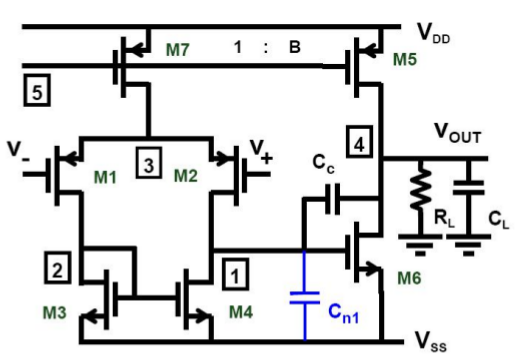

直流增益
\begin{align}
    A_1 &= g_{m1} (r_{o4} // r_{o2}) \\
    A_2 &= g_{m6} (r_{o5} // r_{o6})
\end{align}

因为密勒补偿，节点1上的电容突然增大到了$1 + g_{m6} (r_{o6} // r_{o5} // R_L)$倍，所以节点1成为了产生主极点的节点。
\begin{align}
    f_1 = {1 \over 2 \pi r_{n1} C_{n1}}
\end{align}
其中
\begin{align}
    r_{n1} &= r_{o4} // r_{o2} \\
    C_{n1} &= [1 + A_2] C_c + 其他寄生电容 \approx (1 + A_2) C_c \approx A_2 C_c
\end{align}
增益带宽积
\begin{align}
    {\rm GBW} &= f_1 A_1 A_2 \\
    &\approx {g_{m1} \over 2 \pi C_c}
\end{align}

输出节点成为了次主极点
\begin{align}
    f_2 = {1 \over 2 \pi r_{n4} C_{n4}}
\end{align}
其中**输出节点的输出电阻**是很复杂的
\begin{align}
    r_{n4} &= (r_{o6} // r_{o5} // R_L) + {1 \over g_{m6} \cdot {C_c \over C_c + C_{n1}}} \\
    &\approx {1 \over g_{m6}} {C_c + C_{n1} \over C_c}
\end{align}
第一项很容易，就是常规的输出电阻。但是第二项是因为$C_c$的加入，导致M6的g端分压产生的。设想输出端加入一个测试源$v_x$，因为电容分压，所以M6的g端电压会变成${C_c \over C_c + C_{n1}} v_x$，这会引起输出电流增大$g_{m6} {C_c \over C_c + C_{n1}} v_x$，所以输出电阻增加${1 \over g_{m6} {C_c \over C_c + C_{n1}}}$。